# Sentiment Analysis with Hotel Reviews

## Read and Explore data (EDA)

In [1]:
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks, DependencyParser, SpellCheck 

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from pandas import read_excel
my_sheet = 'Sheet2' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'C:\Users\Zahra\Downloads\Labeled-Sentences.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)

In [7]:
df.head()

,Unnamed: 0,star,label,good=1,fair=0,excellent=2
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,NaN,NaN,NaN
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,NaN,NaN,NaN
2,من ب این هتل امتیاز کامل میدم,5,2,NaN,NaN,NaN
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,NaN,NaN,NaN
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,NaN,NaN,NaN


Description of each columns:

Unnamed:0 : people's opinion about hotel (we can change this column name into review to have meaning to us.)

star : star of the hotel people say about

label : people sentiment about that hotel (1:good, 0:fair, excellent:2)

**unnamed:0 is feature and label is target.**

In [9]:
df['Unnamed: 0'][0]

'واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا ومراکز خرید'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 6 columns):
Unnamed: 0     703 non-null object
star           703 non-null int64
label          703 non-null int64
good=1         0 non-null float64
fair=0         0 non-null float64
excellent=2    0 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 33.0+ KB


In [13]:
df.shape

(703, 6)

In [14]:
df.describe()

,star,label,good=1,fair=0,excellent=2
count,703.000000,703.000000,0.0,0.0,0.0
mean,4.278805,1.645804,NaN,NaN,NaN
std,0.783878,0.738449,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN
25%,4.000000,2.000000,NaN,NaN,NaN
50%,4.000000,2.000000,NaN,NaN,NaN
75%,5.000000,2.000000,NaN,NaN,NaN
max,5.000000,2.000000,NaN,NaN,NaN


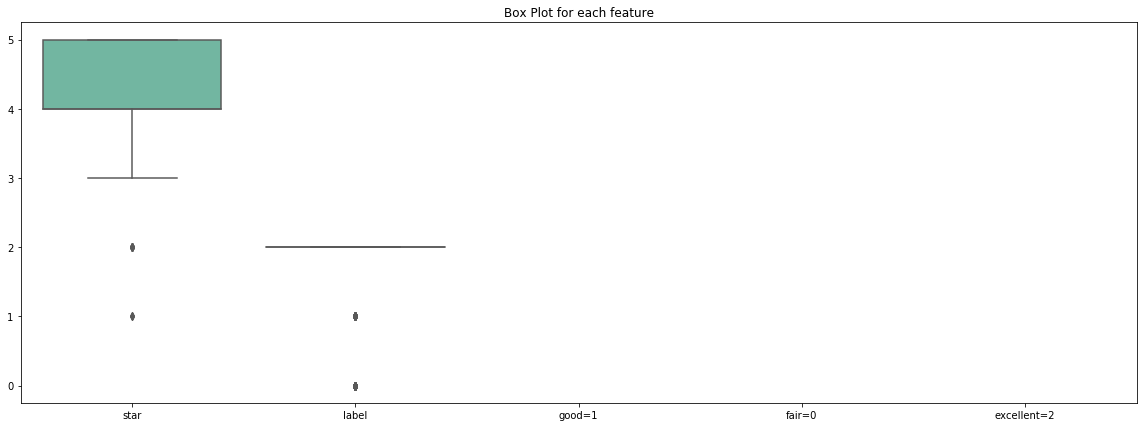

In [53]:
import seaborn as sns

fig = plt.figure(figsize =(20, 7))
# Creating Box plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")
plt.show()

We should not consider **star** as a feature, because it doesn't get us any extra information. So, our reviews are features and label is target.

In [15]:
df.label.value_counts()

2    565
0    111
1     27
Name: label, dtype: int64

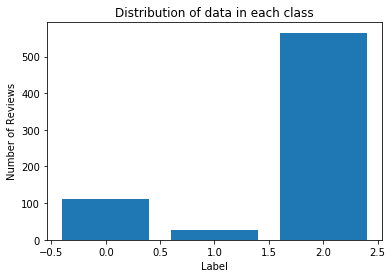

In [20]:
# distribution of data in each class
distribution = list(df.label.value_counts())

import matplotlib.pyplot as plt
plt.bar([2, 0, 1] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of data in each class")
plt.show()

As we see, number of reviews in class 2 (excellent) are more than other classes. So it may cause bias in our model.And it's better to have balanced data, but now we don't treat this problem to see the result of models.

In [42]:
# sample fair review
df[df['label']==0].sample(n=1)['Unnamed: 0'].iloc[0]

'تمیزه، تازه بازسازی شده و همه چی نو به نظر میاد غیر از مبل داخل اتاق ها، اما مبلمان و تخت ها و کمدها خیلی بی کیفیته ممکنه در کمد رو که باز کنین بشکنه'

In [43]:
# sample good review
df[df['label']==1].sample(n=1)['Unnamed: 0'].iloc[0]

' فقط نور اتاقها کم بود ولی اتاق بزرگ و خوبی بهمون دادن'

In [45]:
# sample exellent review
df[df['label']==2].sample(n=1)['Unnamed: 0'].iloc[0]

' خود هتل هم نسبت به سایر هتلهای شمال شیک و مدرن به نظر میرسید '

In [60]:
def data_preprocessing(review):
    
    # normalizing the text
    normalizer = Normalizer()
    review = normalizer.normalize(review)
    
    # spell correction
    checker = SpellCheck()
    review = checker.spell_corrector(review)
    
    # sentence segmentation
    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(review)
    
    # stemming 
    stemmer = FindStems()
    review = [stemmer.convert_to_stem(word) for word in words]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [61]:
df['preprocessing_review'] = df['Unnamed: 0'].apply(lambda review: data_preprocessing(review))

In [62]:
df.head()

,Unnamed: 0,star,label,good=1,fair=0,excellent=2,preprocessing_review
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,NaN,NaN,NaN,واقعا هتل خوبی‌بود ... از لحاظ نزدیکی به دریا ...
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,NaN,NaN,NaN,از همه مهم پرسنل خیلی خوبی داشت&دار
2,من ب این هتل امتیاز کامل میدم,5,2,NaN,NaN,NaN,من ب این هتل امتیاز کامل مردم
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,NaN,NaN,NaN,از نظر ترانسفر فرودگاه بسیار عالی برخورد
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,NaN,NaN,NaN,پرسنل عالی برخورد رستوران حرف داشت&دار


In [151]:
# Save dataframe
df.to_pickle(r'C:\Users\Zahra\Downloads\label_sentiment_preprocess.pkl')

In [154]:
# load the preprocessing dataframe
# df1 = pd.read_pickle(r'C:\Users\Zahra\Downloads\label_sentiment_preprocess.pkl')
# df1.head()

In [63]:
df['preprocessing_review'][0]

'واقعا هتل خوبی\u200cبود ... از لحاظ نزدیکی به دریا و مرکز خرید'

In [65]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(labels=['Unnamed: 0', 'label', 'good=1', 'fair=0', 'excellent=2'], axis=1, inplace=True) # remove useless columns

data.head()

,star,preprocessing_review
0,5,واقعا هتل خوبی‌بود ... از لحاظ نزدیکی به دریا ...
1,5,از همه مهم پرسنل خیلی خوبی داشت&دار
2,5,من ب این هتل امتیاز کامل مردم
3,4,از نظر ترانسفر فرودگاه بسیار عالی برخورد
4,4,پرسنل عالی برخورد رستوران حرف داشت&دار


In [67]:
y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

### Split train and test dataset

In [68]:
# split train and test
# we set straify to have the same proportion of each class in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y) 

print(f'Train data: {X_train.shape} {y_train.shape}')
print(f'Test data: {X_test.shape} {y_test.shape}')

Train data: (562, 2) (562,)
Test data: (141, 2) (141,)


## Extract Featurs

### Bag of words

In [69]:
# Loading NLTk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zahra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# we have used min_df=5 as we only wants those words which occurs at least 5 times in the whole corpus.
cv = CountVectorizer(min_df=5)
X_train_bow = cv.fit_transform(X_train['preprocessing_review'])
X_test_bow = cv.transform(X_test['preprocessing_review'])

print(f'X_train_bow shape : {X_train_bow.shape}')
print(f'X_test_bow shape : {X_test_bow.shape}')

X_train_bow shape : (562, 247)
X_test_bow shape : (141, 247)


In [77]:
type(X_train_bow)

scipy.sparse.csr.csr_matrix

In [78]:
type(X_train)

pandas.core.frame.DataFrame

### TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=5)
X_train_tfidf = tf.fit_transform(X_train['preprocessing_review'])
X_test_tfidf = tf.transform(X_test['preprocessing_review'])

print(f'X_train_tfidf shape : {X_train_tfidf.shape}')
print(f'X_test_tfidf shape : {X_test_tfidf.shape}')

X_train_tfidf shape : (562, 247)
X_test_tfidf shape : (141, 247)


## Model Training

In [98]:
#### to do: base model(predict 2 for all of dataset) ###

### MultinomialNB (BoW)

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

# model generation using multinomial naive bayes
clf_NB = MultinomialNB().fit(X_train_bow, y_train)
predicted = clf_NB.predict(X_test_bow)
print(f'MultinomialNB Accuracy : {metrics.accuracy_score(y_test, predicted)}')

MultinomialNB Accuracy : 0.851063829787234


In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.00      0.00      0.00         6
           2       0.90      0.95      0.92       113

    accuracy                           0.85       141
   macro avg       0.51      0.51      0.51       141
weighted avg       0.82      0.85      0.83       141



In [93]:
from sklearn import metrics
import numpy as np
import pandas as pd

#define a fuction for confusion matrix
def confusion_matrix(y_test, predicted):

    cnf_matrix_NBbow = metrics.confusion_matrix(y_test, predicted)
    class_names=[0,1,2] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix_NBbow), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

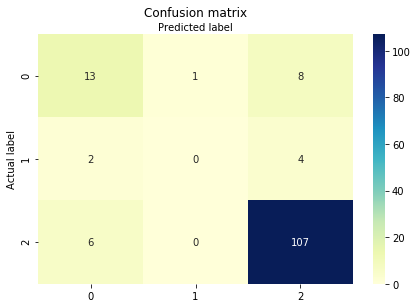

In [94]:
confusion_matrix(y_test, predicted)    

### MultinomialNB (TF-IDF)

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

# model generation using multinomial naive bayes
clf_NB_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)
predicted_NB_tfidf = clf_NB_tfidf.predict(X_test_tfidf)
print(f'MultinomialNB Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_NB_tfidf)}')

MultinomialNB Accuracy (TF-IDF) : 0.8581560283687943


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_NB_tfidf))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.00      0.00      0.00         6
           2       0.85      0.99      0.92       113

    accuracy                           0.86       141
   macro avg       0.58      0.47      0.49       141
weighted avg       0.83      0.86      0.82       141



C:\Users\Zahra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


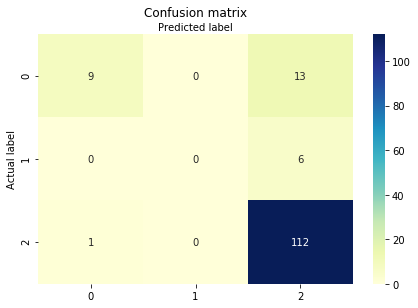

In [92]:
confusion_matrix(y_test, predicted_NB_tfidf) 

As we see, moltinomialNB model with TF-IDF feature generation method has better accuracy than same model with BoW feature generation method.

### KNNClassification (BoW)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Select an algorithm
algorithm = KNeighborsClassifier()

# Select list of possible hyperparameters to search girdsearch into them
neighbors = np.arange(3, 16)
param_grid  = dict(n_neighbors=neighbors)

# Search for best hyperparameters
grid_knn_bow = GridSearchCV(estimator=algorithm, param_grid=param_grid)

grid_knn_bow.fit(X_train_bow, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
# Get the results
print(f'best score of gird search : {grid_knn_bow.best_score_}')
print(f'best estimator : {grid_knn_bow.best_estimator_}')
print(f'best parameters : {grid_knn_bow.best_params_}')

best score of gird search : 0.8149466192170819
best estimator : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
best parameters : {'n_neighbors': 7}


In [106]:
predicted_knn_bow = grid_knn_bow.predict(X_test_bow)
print(f'KNNclassifier Accuracy (BoW) : {metrics.accuracy_score(y_test, predicted_knn_bow)}')

KNNclassifier Accuracy (BoW) : 0.8226950354609929


In [110]:
print(classification_report(y_test, predicted_knn_bow))

              precision    recall  f1-score   support

           0       0.55      0.27      0.36        22
           1       0.00      0.00      0.00         6
           2       0.85      0.97      0.91       113

    accuracy                           0.82       141
   macro avg       0.46      0.42      0.42       141
weighted avg       0.76      0.82      0.78       141



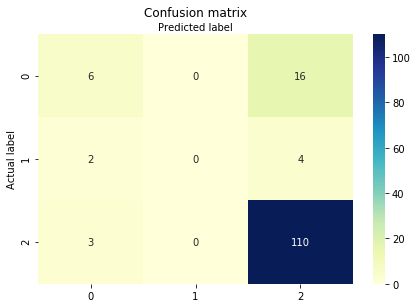

In [111]:
confusion_matrix(y_test, predicted_knn_bow) 

### KNNClassification (TF-IDF)

In [112]:
# Select an algorithm
algorithm = KNeighborsClassifier()

# Select list of possible hyperparameters to search girdsearch into them
neighbors = np.arange(3, 16)
param_grid  = dict(n_neighbors=neighbors)

# Search for best hyperparameters
grid_knn_tfidf = GridSearchCV(estimator=algorithm, param_grid=param_grid)

grid_knn_tfidf.fit(X_train_tfidf, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
# Get the results
print(f'best score of gird search : {grid_knn_tfidf.best_score_}')
print(f'best estimator : {grid_knn_tfidf.best_estimator_}')
print(f'best parameters : {grid_knn_tfidf.best_params_}')

best score of gird search : 0.8469750889679716
best estimator : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
best parameters : {'n_neighbors': 5}


In [115]:
predicted_knn_tfidf = grid_knn_tfidf.predict(X_test_tfidf)
print(f'KNNclassifier Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_knn_tfidf)}')

KNNclassifier Accuracy (TF-IDF) : 0.851063829787234


In [121]:
print(classification_report(y_test, predicted_knn_tfidf))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.00      0.00      0.00         6
           2       0.89      0.97      0.93       113

    accuracy                           0.85       141
   macro avg       0.52      0.48      0.49       141
weighted avg       0.81      0.85      0.83       141



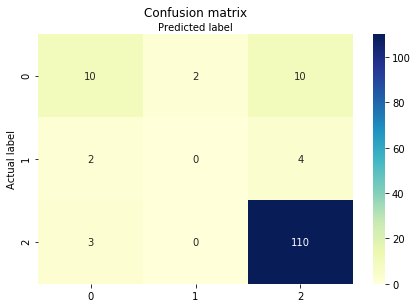

In [116]:
confusion_matrix(y_test, predicted_knn_tfidf) 

As we see in the results of these four models, the models that train on the dataset with the TF-IDF feature generation method, have better accuracy than others. So, after this, we train our ML models on the dataset with the TF-IDF feature generation method.

### SVM Classification (TD-IDF)

In [134]:
from sklearn.svm import SVC

# defining parameter range
# C : regularization parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid'],
              'decision_function_shape': ['ovr', 'ovo']} 

grid_svc2 = GridSearchCV(SVC(), param_grid, refit = True)
grid_svc2.fit(X_train_tfidf, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
# Get the results
print(f'best score of gird search : {grid_svc2.best_score_}')
print(f'best estimator : {grid_svc2.best_estimator_}')
print(f'best parameters : {grid_svc2.best_params_}')

best score of gird search : 0.8362989323843416
best estimator : SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best parameters : {'C': 1, 'decision_function_shape': 'ovr', 'gamma': 1, 'kernel': 'linear'}


In [136]:
predicted_svc2 = grid_svc2.predict(X_test_tfidf)
print(f'SVC Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_svc2)}')

SVC Accuracy (TF-IDF) : 0.851063829787234


In [137]:
print(classification_report(y_test, predicted_svc2))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        22
           1       0.00      0.00      0.00         6
           2       0.86      0.97      0.91       113

    accuracy                           0.85       141
   macro avg       0.54      0.48      0.49       141
weighted avg       0.81      0.85      0.82       141



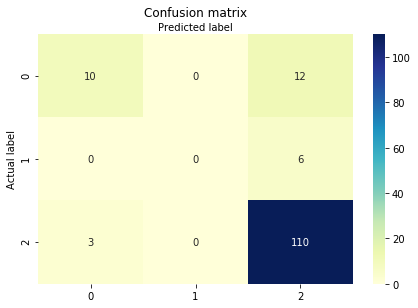

In [138]:
confusion_matrix(y_test, predicted_svc2) 

### Decision Tree Classification (TD-IDF)

In [125]:
from sklearn.tree import DecisionTreeClassifier 
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(criterion=criterion, max_depth=max_depth)

grid_dt = GridSearchCV(DecisionTreeClassifier(), parameters)
grid_dt.fit(X_train_tfidf, y_train)     

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
           

In [129]:
# Get the results
print(f'best score of gird search : {grid_dt.best_score_}')
print(f'best estimator : {grid_dt.best_estimator_}')
print(f'best parameters : {grid_dt.best_params_}')

best score of gird search : 0.8309608540925267
best estimator : DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best parameters : {'criterion': 'entropy', 'max_depth': 6}


In [131]:
predicted_dt = grid_dt.predict(X_test_tfidf)
print(f'Decision Tree Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_dt)}')

Decision Tree Accuracy (TF-IDF) : 0.8368794326241135


In [132]:
print(classification_report(y_test, predicted_dt))

              precision    recall  f1-score   support

           0       0.75      0.41      0.53        22
           1       0.00      0.00      0.00         6
           2       0.87      0.96      0.91       113

    accuracy                           0.84       141
   macro avg       0.54      0.46      0.48       141
weighted avg       0.81      0.84      0.81       141



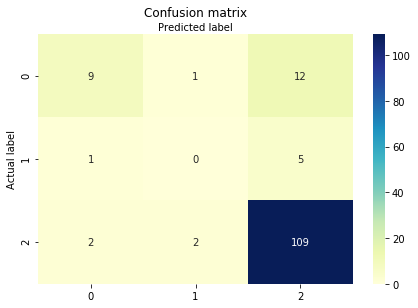

In [133]:
confusion_matrix(y_test, predicted_dt) 

### Multinomial Logistic Reggresion (TD-IDF)

In [140]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs','sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

parameters = dict(solver=solvers, penalty=penalty, C=c_values)

grid_lr = GridSearchCV(LogisticRegression(multi_class='multinomial'), parameters)
grid_lr.fit(X_train_tfidf, y_train)     

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [141]:
# Get the results
print(f'best score of gird search : {grid_lr.best_score_}')
print(f'best estimator : {grid_lr.best_estimator_}')
print(f'best parameters : {grid_lr.best_params_}')

best score of gird search : 0.8434163701067615
best estimator : LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
best parameters : {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [142]:
predicted_lr = grid_lr.predict(X_test_tfidf)
print(f'Logistic Regression Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_lr)}')

Logistic Regression Accuracy (TF-IDF) : 0.8368794326241135


In [143]:
print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56        22
           1       0.00      0.00      0.00         6
           2       0.86      0.95      0.90       113

    accuracy                           0.84       141
   macro avg       0.50      0.48      0.49       141
weighted avg       0.79      0.84      0.81       141



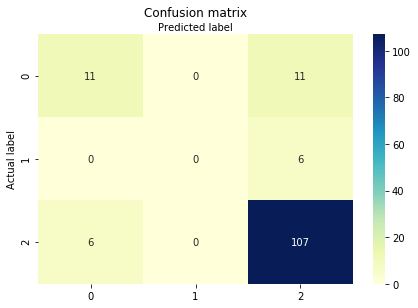

In [144]:
confusion_matrix(y_test, predicted_lr) 

### Random Forest (TD-IDF)

In [145]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
criterion = ['gini', 'entropy']

parameters = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterion)

grid_rf = GridSearchCV(RandomForestClassifier(), parameters)
grid_rf.fit(X_train_tfidf, y_train)     

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [146]:
# Get the results
print(f'best score of gird search : {grid_rf.best_score_}')
print(f'best estimator : {grid_rf.best_estimator_}')
print(f'best parameters : {grid_rf.best_params_}')

best score of gird search : 0.8434163701067615
best estimator : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best parameters : {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}


In [147]:
predicted_rf = grid_rf.predict(X_test_tfidf)
print(f'Random Forest Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_rf)}')

Random Forest Accuracy (TF-IDF) : 0.8652482269503546


In [148]:
print(classification_report(y_test, predicted_rf))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63        22
           1       0.00      0.00      0.00         6
           2       0.87      0.98      0.92       113

    accuracy                           0.87       141
   macro avg       0.57      0.49      0.52       141
weighted avg       0.83      0.87      0.84       141



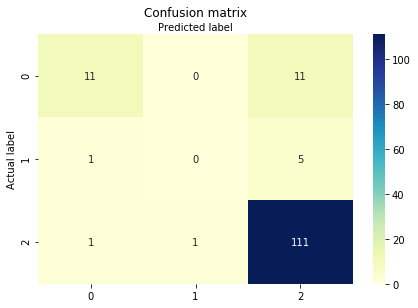

In [149]:
confusion_matrix(y_test, predicted_rf) 

Till now, Random forest has better accuracy than other models.

**Random Forest > MultinomialNB > KNN = SVC > Decistion Tree = Multinomial Logistic Regression**

### XGBoost (TD-IDF) 

In [159]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [160]:
import xgboost as xgb

n_estimators = [10, 100, 1000]
max_depth = [3, 5, 7, 10]
learning_rate = [0.1, 0.01, 0.001]

parameters = dict(n_estimators =n_estimators, max_depth=max_depth, learning_rate = learning_rate)
grid_xgb = GridSearchCV(xgb.XGBClassifier(bjective='multi:softmax'), parameters)
grid_xgb.fit(X_train_tfidf, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, bjective='multi:softmax',
                                     booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth':

In [161]:
# Get the results
print(f'best score of gird search : {grid_xgb.best_score_}')
print(f'best estimator : {grid_xgb.best_estimator_}')
print(f'best parameters : {grid_xgb.best_params_}')

best score of gird search : 0.8505338078291815
best estimator : XGBClassifier(base_score=0.5, bjective='multi:softmax', booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
best parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [162]:
predicted_xgb = grid_xgb.predict(X_test_tfidf)
print(f'XGBoost Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_xgb)}')

XGBoost Accuracy (TF-IDF) : 0.851063829787234


In [163]:
print(classification_report(y_test, predicted_xgb))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.00      0.00      0.00         6
           2       0.87      0.97      0.92       113

    accuracy                           0.85       141
   macro avg       0.51      0.48      0.49       141
weighted avg       0.80      0.85      0.82       141



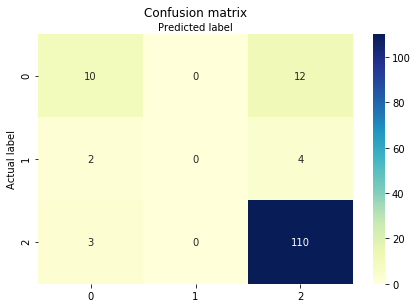

In [164]:
confusion_matrix(y_test, predicted_xgb) 

### Ensemble Learninig (Voting) (TD-IDF)

In [165]:
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model_knn = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn', model_knn))
model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6)
estimators.append(('cart', model_dt))
model_svc = SVC(C=1, decision_function_shape='ovr', gamma=1, kernel='linear')
estimators.append(('svm', model_svc))

# create the ensemble model
ensemble_vote = VotingClassifier(estimators)
ensemble_vote.fit(X_train_tfidf,y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=6,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     mi

In [167]:
predicted_ensvote = ensemble_vote.predict(X_test_tfidf)
print(f'Voting Accuracy (TF-IDF) : {metrics.accuracy_score(y_test, predicted_ensvote)}')

Voting Accuracy (TF-IDF) : 0.8581560283687943


In [168]:
print(classification_report(y_test, predicted_ensvote))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        22
           1       0.00      0.00      0.00         6
           2       0.86      0.98      0.92       113

    accuracy                           0.86       141
   macro avg       0.56      0.48      0.50       141
weighted avg       0.82      0.86      0.83       141



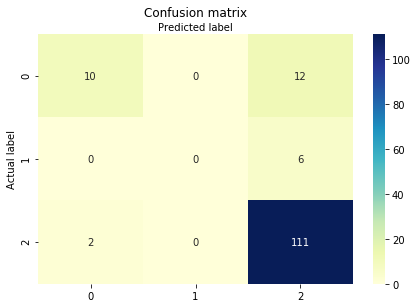

In [169]:
confusion_matrix(y_test, predicted_ensvote) 

**Random Forest > MultinomialNB = Voting > KNN = SVC =XGBoost > Decistion Tree = Multinomial Logistic Regression**

## Model Comparision

In [170]:
acc = [0.8581, 0.8510,0.8510,0.8368,0.8368,0.8652, 0.8510,  0.8581]
classifier = ['MultinomialNB','KNN','SVC','DT','logistic reg', 'Random Forest','XGBoost', 'Voting']

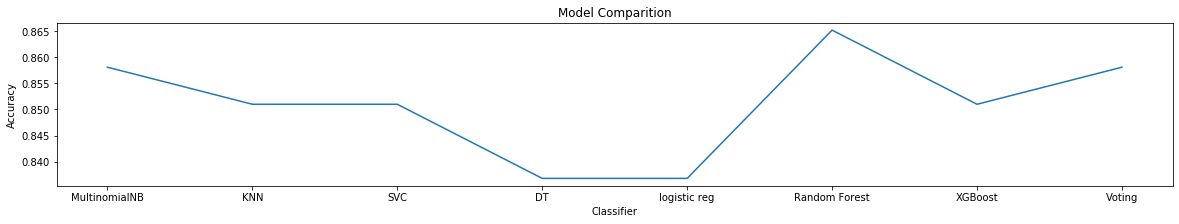

In [179]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(classifier ,acc)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Model Comparition")
plt.show()

According to our data, because distribution of data in each class is not balanced, and most of the data are in the 'good=2' class, our model may have bias. If we construct a baseline model that predicts 2 for every input, the accuracy of this model, becomes about 80%. So, we should treat imbalanced data to get good result.
From the results, Random Forest has better accuracy than other models because it's an ensemble learning model.
